In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import RDConfig, Draw
#from IPython.core.display import HTML
#from rdkit.Chem.Draw import rdMolDraw2D
from pathlib import Path 
#from io import BytesIO
#import joblib
#import base64
import glob
import os
from rdkit import DataStructs

# AiZynthFinder outputs - similarity

In [3]:
path = 'data/balanced_data'
files = Path(path).glob('*.csv') 

In [4]:
all_files = glob.glob(os.path.join(path , "*.csv"))
frames = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    frames.append(df)
df = pd.concat(frames, axis=0, ignore_index=True)

In [5]:
df = df.drop_duplicates(subset = 'target')

In [6]:
len(df)

20000

In [7]:
df = df[df.number_of_steps <= 10]
df = df[df.number_of_steps > 0]
len(df)

15918

<AxesSubplot:>

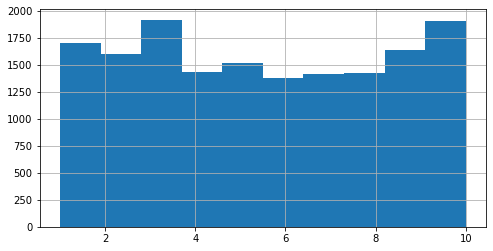

In [8]:
plt.figure(figsize=(8,4))
df.number_of_steps.hist() 

In [9]:
df['steps_bins'] = pd.cut(df['number_of_steps'], [0,1,3,6,10], labels=False) #, labels=False
df.steps_bins.value_counts()

3    6378
2    4324
1    3514
0    1702
Name: steps_bins, dtype: int64

In [10]:
all_mols = [Chem.MolFromSmiles(smile) for smile in df.target]
fingers = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in all_mols]
df['mol'] = all_mols
df['finger'] = fingers

# Similarity

In [11]:
def similarity_search(df, f): 
    sim = [DataStructs.FingerprintSimilarity(x, f) for x in df.finger]
    return sim

def similarity(df):
    distance_matrix = []
    for i in range(0,len(df)):
        s = similarity_search(df, df.finger[i])
        distance_matrix.append(s)
    return distance_matrix

In [12]:
df_0 = df[df.steps_bins == 0]
df_0 = df_0.reset_index()
df_1 = df[df.steps_bins == 1]
df_1 = df_1.reset_index()
df_2 = df[df.steps_bins == 2]
df_2 = df_2.reset_index()
df_3 = df[df.steps_bins == 3]
df_3 = df_3.reset_index()

In [13]:
mean = []
std = []
for fps in df_0.finger:
    a = similarity_search(df_0, fps)
    mean.append(np.mean(a))
    std.append(np.std(a))
df_0 = df_0.assign(mean = mean, std = std)

In [14]:
df_0['mean'].mean()

0.13924896780232923

<AxesSubplot:xlabel='mean', ylabel='Count'>

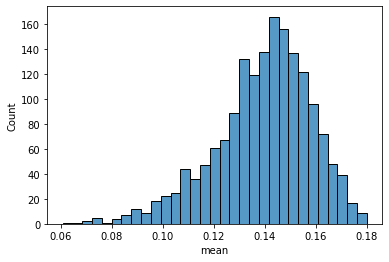

In [15]:
sns.histplot(df_0['mean'])

In [16]:
mean = []
std = []
for fps in df_1.finger:
    a = similarity_search(df_1, fps)
    mean.append(np.mean(a))
    std.append(np.std(a))
df_1 = df_1.assign(mean = mean, std = std)

In [17]:
df_1['mean'].mean()

0.1316148289708285

<AxesSubplot:xlabel='mean', ylabel='Count'>

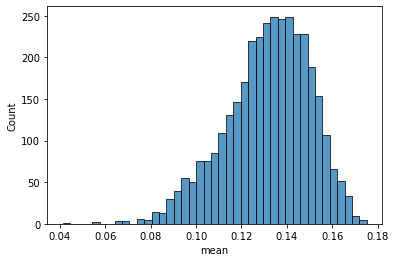

In [18]:
sns.histplot(df_1['mean'])

In [19]:
mean = []
std = []
for fps in df_2.finger:
    a = similarity_search(df_2, fps)
    mean.append(np.mean(a))
    std.append(np.std(a))
df_2 = df_2.assign(mean = mean, std = std)

In [20]:
df_2['mean'].mean()

0.12141268340464373

<AxesSubplot:xlabel='mean', ylabel='Count'>

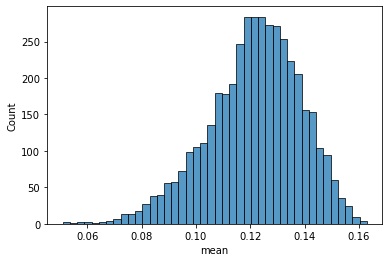

In [21]:
sns.histplot(df_2['mean'])

In [22]:
mean = []
std = []
for fps in df_3.finger:
    a = similarity_search(df_3, fps)
    mean.append(np.mean(a))
    std.append(np.std(a))
df_3 = df_3.assign(mean = mean, std = std)

In [23]:
df_3['mean'].mean()

0.1182730130869405

<AxesSubplot:xlabel='mean', ylabel='Count'>

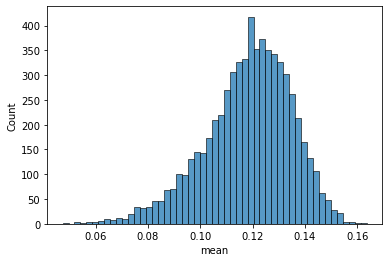

In [24]:
sns.histplot(df_3['mean'])

In [25]:
distance_matrix_0 = similarity(df_0)
distance_matrix_1 = similarity(df_1)
distance_matrix_2 = similarity(df_2)
distance_matrix_3 = similarity(df_3)

<AxesSubplot:ylabel='Count'>

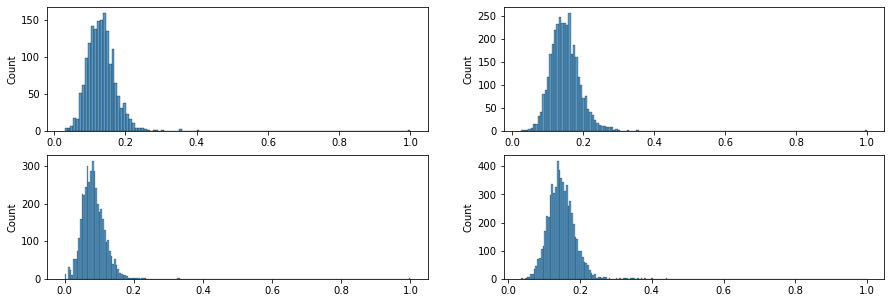

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15,5))

sns.histplot(distance_matrix_0[0], ax=axes[0,0])
sns.histplot(distance_matrix_1[0], ax=axes[0,1])
sns.histplot(distance_matrix_2[0], ax=axes[1,0])
sns.histplot(distance_matrix_3[0], ax=axes[1,1])

In [27]:
# df['similarity']='NO'
# df.loc[df['similar'] > 0.80, 'similarity'] = 'YES'
# df['similarity'].value_counts()